In [1]:
%matplotlib notebook
import numpy as np
import scipy as sp
from discretize.utils import meshutils
import inspect
from SimPEG import Utils, Mesh
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

In this example, we demonstrate different mesh refinement strategies available for TreeMesh under the Utils.
First let's define a simple ground survey and topography.

In [2]:
# Define a simple Gaussian topography
[xx, yy] = np.meshgrid(np.linspace(-100,100,11), np.linspace(-100,100,11))
b = 50
A = 105
zz = A*np.exp(-1*((xx/b)**2. + (yy/b)**2.))

topo = np.c_[xx.reshape(-1), yy.reshape(-1), zz.reshape(-1)]

xx = np.linspace(-100,100,11)
b = 50
A = 100
zz = A*np.exp(-1*((xx/b)**2.))

topo2D = np.c_[xx, zz]

print(topo.shape)

(121, 3)


In [3]:
meshBox = meshutils.mesh_builder_xyz(topo, [5, 5, 5], 
                                  padding_distance=[[0,0], [300,0], [0,100]],
                                  mesh_type="TREE")

meshBox = meshutils.refine_tree_xyz(meshBox, topo, method='box', finalize=True)


meshRad = meshutils.mesh_builder_xyz(topo, [5, 5, 5], 
                                  padding_distance=[[0,0], [300,0], [0,100]],
                                  mesh_type="TREE")

meshRad = meshutils.refine_tree_xyz(meshRad, topo, method='radial', octree_levels=[2], finalize=True)


meshSurf = meshutils.mesh_builder_xyz(topo, [5, 5, 5], 
                                  padding_distance=[[0,0], [300,0], [0,100]],
                                  mesh_type="TREE")

meshSurf = meshutils.refine_tree_xyz(meshSurf, topo, method='surface', finalize=True)



In [18]:
vmin, vmax


(2.0969100130080562, 5.70926996097583)

<IPython.core.display.Javascript object>


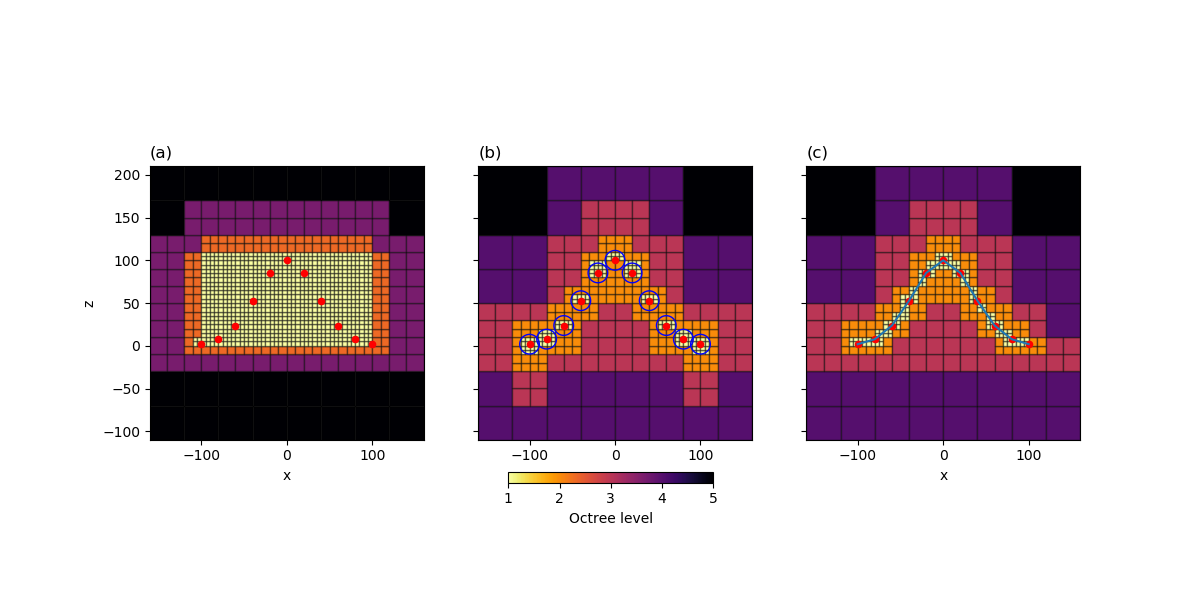

In [19]:
fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,3,1)
meshBox.plotSlice(np.log10(meshBox.vol)-1, grid=True, normal='Y', pcolorOpts={"cmap":'inferno_r'}, ax=ax1)
ax1.scatter(topo2D[:,0], topo2D[:,1], 20, color='r')
ax1.set_title('(a)', loc= 'left')
ax1.set_title('', loc= 'center')
# ax1.set_xticklabels([])
# ax1.set_xlabel('')
ax1.set_aspect('equal')

ax2 = plt.subplot(1,3,2)
im = meshRad.plotSlice(np.log10(meshRad.vol)-1, grid=True, normal='Y', ax=ax2, pcolorOpts={"cmap":'inferno_r'})
ax2.scatter(topo2D[:,0], topo2D[:,1], 20, color='r')
ax2.scatter(topo2D[:,0], topo2D[:,1], 200, color='b', marker='o', facecolors='none')
ax2.set_title('(b)', loc= 'left')
ax2.set_title('', loc= 'center')
ax2.set_yticklabels([])
ax2.set_ylabel('')
ax2.set_aspect('equal')

pos = ax2.get_position()
vmin, vmax = np.log10(meshRad.vol).min()-1, np.log10(meshRad.vol).max()-1
axbar = plt.axes([pos.x0+.025, pos.y0-0.075,  pos.width*.75, pos.height*.3])
cbar = plt.colorbar(im[0], orientation='horizontal',format='%.0f')
cbar.set_ticks(np.linspace(vmin,vmax,5))
# cbar.set_ticklabels(np.linspace(1,5,5))
cbar.set_label("Octree level", size=10)
# axbar.text(pos.x0, pos.y0-.5,'mGal', size=10)
axbar.axis('off')


ax3 = plt.subplot(1,3,3)
meshSurf.plotSlice(np.log10(meshSurf.vol)-1, grid=True, normal='Y', ax=ax3, pcolorOpts={"cmap":'inferno_r'})
ax3.plot(topo2D[:,0], topo2D[:,1])
ax3.scatter(topo2D[:,0], topo2D[:,1], 20, color='r')
ax3.set_title('(c)', loc= 'left')
ax3.set_title('', loc= 'center')
ax3.set_yticklabels([])
ax3.set_ylabel('')
ax3.set_aspect('equal')

plt.savefig("Refinements.png", dpi=300, bbox_inches='tight')

In [2]:


# Define a circle
theta = np.linspace(0,np.pi,5)
x = np.cos(theta)
y = np.sin(theta)

xyU = 0.95*np.c_[x, y]
xyL = 0.95*np.c_[x, -y]

xy = np.r_[xyU, xyL]

In [3]:
actvTensor



NameError: name 'actvTensor' is not defined

# Create 3D tensor

In [4]:
h = 0.05
pad = [[1, 1], [1,1]]
center = np.r_[0,0]
rad = 0.95

meshTensor = meshutils.mesh_builder_xyz(xy, [h, h], padding_distance=pad)
meshTensor.x0 = [-2., -2.]
actvTensor = Utils.ModelBuilder.getIndicesSphere(center, rad, meshTensor.gridCC)

meshRadial = meshutils.mesh_builder_xyz(xy, [h, h], padding_distance=pad, mesh_type='TREE')
meshRadial.x0 = [-3,-3]
meshRadial = meshutils.refine_tree_xyz(meshRadial, xy, octree_levels=[3], method='radial', finalize=True)
actvRadial = Utils.ModelBuilder.getIndicesSphere(center, rad, meshRadial.gridCC)

meshBox = meshutils.mesh_builder_xyz(xy, [h, h], padding_distance=pad, mesh_type='TREE')
meshBox.x0 = [-3,-3]
meshBox = meshutils.refine_tree_xyz(meshBox, xy, octree_levels=[3], method='box', finalize=True)
actvBox = Utils.ModelBuilder.getIndicesSphere(center, rad, meshBox.gridCC) 

meshSurf = meshutils.mesh_builder_xyz(xy, [h, h], padding_distance=pad, mesh_type='TREE')
meshSurf.x0 = [-3,-3]
meshSurf = meshutils.refine_tree_xyz(meshSurf, xyU, octree_levels=[2], method='surface', finalize=False)
meshSurf = meshutils.refine_tree_xyz(meshSurf, xyL, octree_levels=[2], method='surface', finalize=True)
actvSurf = Utils.ModelBuilder.getIndicesSphere(center, rad, meshSurf.gridCC)

In [5]:
meshTensor.x0


array([-2., -2.])

<IPython.core.display.Javascript object>


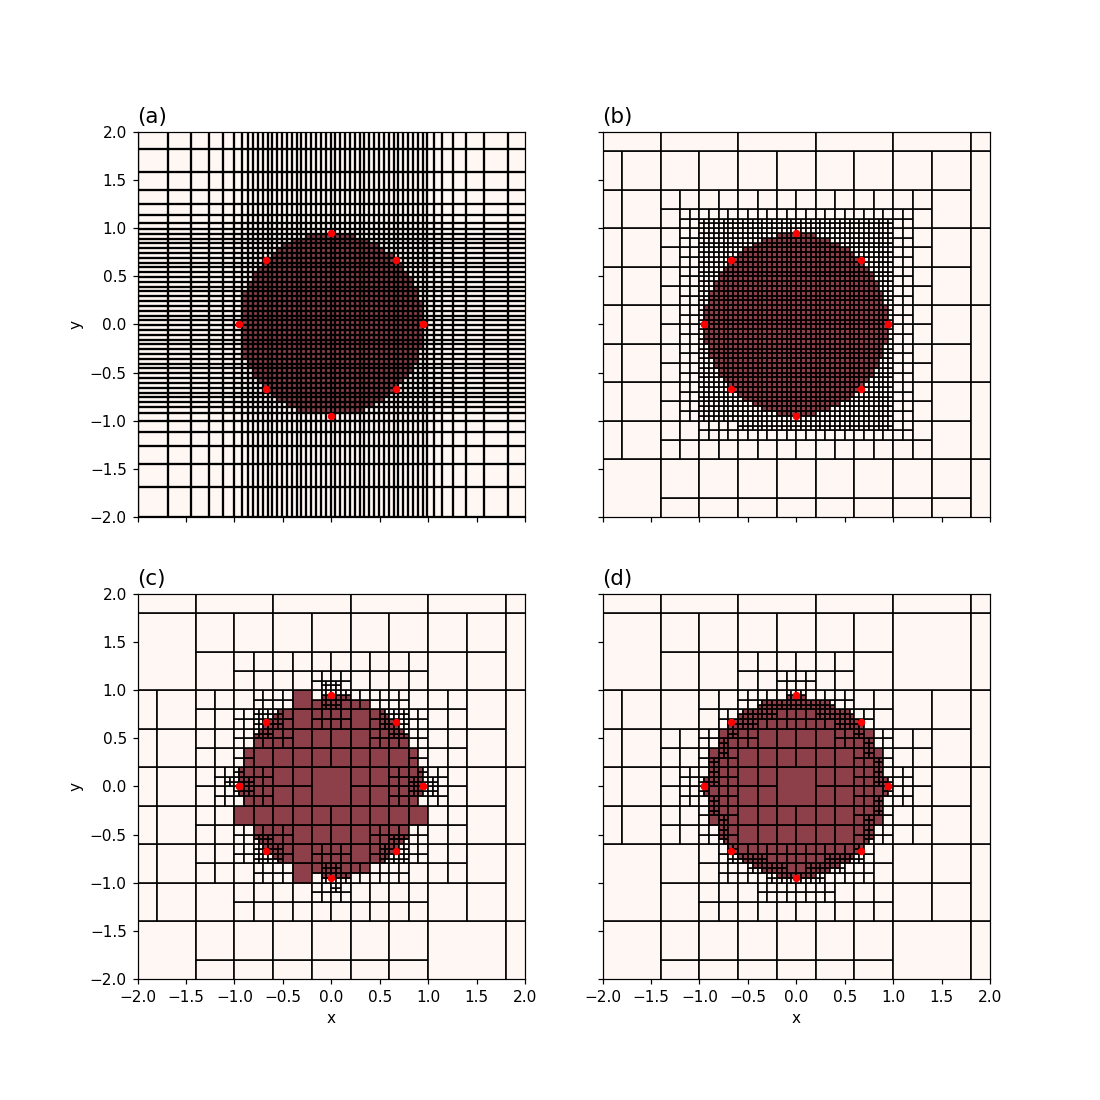

In [6]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
meshTensor.plotImage(actvTensor, grid=True, pcolorOpts={"cmap":'Reds', 'alpha':0.75}, ax=ax1)
# meshTensor.plotImage(actvTensor, grid=False, pcolorOpts={"cmap":'gray', 'alpha':0.25}, ax=ax1)

plt.scatter(xy[:,0], xy[:,1], 15, 'r', zorder=3)
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_title("(a)", size=14, loc='left')
ax1.set_xlabel("")
ax1.set_xticklabels([])

ax4 = plt.subplot(2,2,2)
meshBox.plotImage(actvBox, grid=True, pcolorOpts={"cmap":'Reds', 'alpha':0.75}, ax=ax4)
# meshBox.plotImage(actvBox, grid=False, pcolorOpts={"cmap":'gray', 'alpha':0.25}, ax=ax4)

plt.scatter(xy[:,0], xy[:,1], 15, 'r', zorder=3)
ax4.set_xlim([-2, 2])
ax4.set_ylim([-2, 2])
ax4.set_title("(b)", size=14, loc='left')
ax4.set_xlabel("")
ax4.set_xticklabels([])
ax4.set_ylabel("")
ax4.set_yticklabels([])

ax2 = plt.subplot(2,2,3)
meshRadial.plotImage(actvRadial, grid=True, pcolorOpts={"cmap":'Reds', 'alpha':0.75}, ax=ax2)
# meshRadial.plotImage(actvRadial, grid=False, pcolorOpts={"cmap":'gray', 'alpha':0.25}, ax=ax2)

plt.scatter(xy[:,0], xy[:,1], 15, 'r', zorder=3)
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_title("(c)", size=14, loc='left')

ax3 = plt.subplot(2,2,4)
meshSurf.plotImage(actvSurf, grid=True, pcolorOpts={"cmap":'Reds', 'alpha':0.75}, ax=ax3)
# meshSurf.plotImage(actvSurf, grid=False, pcolorOpts={"cmap":'gray', 'alpha':0.25}, ax=ax3)

plt.scatter(xy[:,0], xy[:,1], 15, 'r', zorder=3)
ax3.set_xlim([-2, 2])
ax3.set_ylim([-2, 2])
ax3.set_title("(d)", size=14, loc='left')
ax3.set_ylabel("")
ax3.set_yticklabels([])

plt.savefig("Discretization.png", dpi=300, bbox_inches='tight')

# Run refinement and compute residual volume

In [58]:
from SimPEG.Utils import mkvc
theta = np.linspace(-np.pi/2,np.pi/2,22)
phi = np.linspace(-np.pi,np.pi,41)
rad = 0.5
T, P = np.meshgrid(theta,phi)

x = rad*np.cos(mkvc(T)) * np.cos(mkvc(P))
y = rad*np.cos(mkvc(T)) * np.sin(mkvc(P))
z = rad*np.sin(mkvc(T))

xySphereU = np.c_[x[z>=0], y[z>=0], z[z>=0]]
xySphereL = np.c_[x[z<=0], y[z<=0], z[z<=0]]

xySphere = np.r_[xySphereU, xySphereL]

<IPython.core.display.Javascript object>


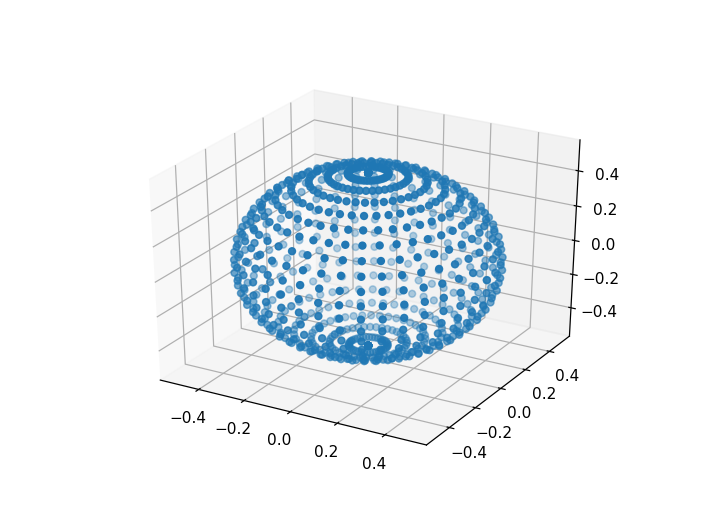

array([-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.49441541, -0.49441541, -0.49441541, -0.49441541,
       -0.49441541, -0.49441541, -0.49441541, -0.49441541, -0.49441541,
       -0.49441541, -0.49441541, -0.49441541, -0.49441541, -0.49441541,
       -0.49441541, -0.49441541, -0.49441541, -0.49441541, -0.49441541,
       -0.49441541, -0.49441541, -0.49441541, -0.49441541, -0.49441541,
       -0.49441541, -0.49441541, -0.49441541, -0.49441541, -0.49

In [59]:
fig = plt.figure()
ax = plt.subplot(projection='3d')

ax.scatter(x,y,z)
z

In [363]:
(0.2/2**np.linspace(0,3,3)).tolist()



np.linspace(0,3,4)










array([0., 1., 2., 3.])

In [170]:
from SimPEG import PF
dX = (0.1/2**np.linspace(0,3,4)).tolist()
pad = [[0.5, 0.5], [0.5,0.5], [0.5,0.5]]
center = np.r_[0,0,0]
chi = 1.

volTensor = []
volRadial = []
volBox = []
volSurf = []

H0 = (50000., 60., 270.)
b0 = np.r_[0,0,50000]

# Create plane of observations
xr = np.linspace(-2, 2, 11)
yr = np.linspace(-2, 2, 11)
X, Y = np.meshgrid(xr, yr)

# Move obs plane 2 radius away from sphere
H0 = (50000, 90, 0)
Z = np.ones((xr.size, yr.size))*2.*rad
locXyz = np.c_[Utils.mkvc(X), Utils.mkvc(Y), Utils.mkvc(Z)]
rxLoc = PF.BaseMag.RxObs(locXyz)
srcField = PF.BaseMag.SrcField([rxLoc], param=H0)
survey = PF.BaseMag.LinearSurvey(srcField)

# Compute theoritical fields
bxa, bya, bza = PF.MagAnalytics.MagSphereFreeSpace(locXyz[:, 0],
                                                   locXyz[:, 1],
                                                   locXyz[:, 2],
                                                   rad, 0, 0, 0,
                                                   chi, b0)

# Projection matrix
Ptmi = mkvc(b0)/np.sqrt(np.sum(b0**2.))

btmi = mkvc(Ptmi.dot(np.vstack((bxa, bya, bza))))
    


<IPython.core.display.Javascript object>


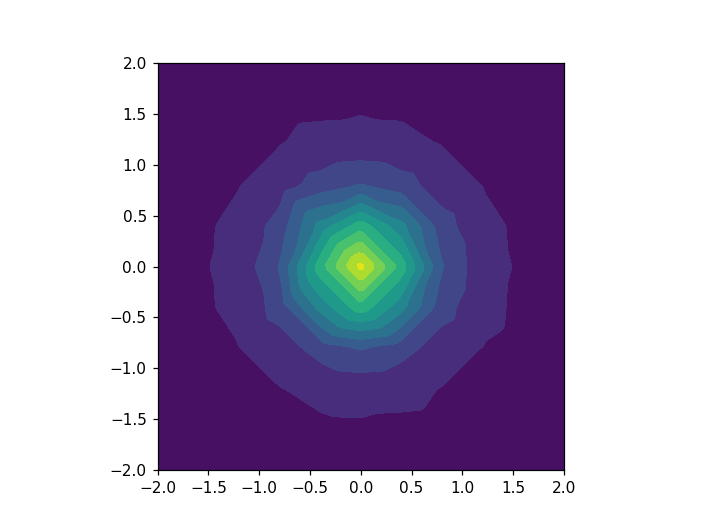

[0.1, 0.05, 0.025, 0.0125]

In [171]:
Utils.plot2Ddata(locXyz[:, :2], btmi)
dX


In [173]:
from SimPEG import Maps
import time
def makeData(mesh,actv,survey):
    
    model = np.ones(mesh.nC)*chi
    model = model[actv]

    nC = int(sum(actv))
    # Creat reduced identity map for Linear Pproblem
    idenMap = Maps.IdentityMap(nP=nC)

    prob_tmi = PF.Magnetics.MagneticIntegral(mesh, chiMap=idenMap,
                                                  actInd=actv,
                                                  forwardOnly=True,
                                                  rxType='tmi',
                                            parallelized=False)
      
    survey.unpair()
    survey.pair(prob_tmi)
    
    dpred = prob_tmi.fields(model)
    
    return dpred

statsTensor = []
statsRadial = []
statsSurf = []
for h in dX:

    
    meshTensor = meshutils.mesh_builder_xyz(xySphere, [h, h, h], padding_distance=pad)
    actvTensor = Utils.ModelBuilder.getIndicesSphere(center, rad, meshTensor.gridCC)
    tc = time.time()
    nC = int(sum(actvTensor))
    dpred = makeData(meshTensor, actvTensor, survey)
    statsTensor += [[nC, np.linalg.norm(mkvc(dpred) - mkvc(btmi)), time.time()-tc, meshTensor.vol[actvTensor].sum()]]
    
    meshRadial = meshutils.mesh_builder_xyz(xySphere, [h, h, h], padding_distance=pad, mesh_type='TREE')
    meshRadial.x0 = [-2,-2,-2]
    meshRadial = meshutils.refine_tree_xyz(meshRadial, xySphere, octree_levels=[3], method='radial', finalize=True)
    actvRadial = Utils.ModelBuilder.getIndicesSphere(center, rad, meshRadial.gridCC)
    tc = time.time()
    nC = int(sum(actvRadial))
    dpred = makeData(meshRadial, actvRadial, survey)
    statsRadial += [[nC, np.linalg.norm(mkvc(dpred) - mkvc(btmi)), time.time()-tc, meshRadial.vol[actvRadial].sum()]]
    
    meshSurf = meshutils.mesh_builder_xyz(xySphere, [h, h, h], padding_distance=pad, mesh_type='TREE')
    meshSurf.x0 = [-2,-2,-2]
    meshSurf = meshutils.refine_tree_xyz(meshSurf, xySphereU, octree_levels=[4], method='surface', finalize=False)
    meshSurf = meshutils.refine_tree_xyz(meshSurf, xySphereL, octree_levels=[4], method='surface', finalize=True)
    actvSurf = Utils.ModelBuilder.getIndicesSphere(center, rad, meshSurf.gridCC)
    tc = time.time()
    nC = int(sum(actvSurf))
    dpred = makeData(meshSurf, actvSurf, survey)
    statsSurf += [[nC, np.linalg.norm(mkvc(dpred) - mkvc(btmi)), time.time()-tc, meshSurf.vol[actvSurf].sum()]]
    
#     meshBox = meshutils.mesh_builder_xyz(xy, [h, h], padding_distance=pad, mesh_type='TREE')
#     meshBox.x0 = [-3,-3]
#     meshBox = meshutils.refine_tree_xyz(meshBox, xy, octree_levels=[3], method='box', finalize=True)
#     actvBox = Utils.ModelBuilder.getIndicesSphere(center, rad, meshBox.gridCC) 

#     meshSurf = meshutils.mesh_builder_xyz(xy, [h, h], padding_distance=pad, mesh_type='TREE')
#     meshSurf.x0 = [-3,-3]
#     meshSurf = meshutils.refine_tree_xyz(meshSurf, xyU, octree_levels=[4], method='surface', finalize=False)
#     meshSurf = meshutils.refine_tree_xyz(meshSurf, xyL, octree_levels=[4], method='surface', finalize=True)
#     actvSurf = Utils.ModelBuilder.getIndicesSphere(center, rad, meshSurf.gridCC)
    
    
#     volRadial += [np.sum(meshRadial.vol[actvRadial])]
#     volBox += [np.sum(meshBox.vol[actvBox])]
#     volSurf += [np.sum(meshSurf.vol[actvSurf])]
statsTensor = np.vstack(statsTensor)
statsRadial = np.vstack(statsRadial)
statsSurf = np.vstack(statsSurf)

Begin forward: M=H0, Rx type= tmi
Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %
Begin forward: M=H0, Rx type= tmi
Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %
Begin forward: M=H0, Rx type= tmi
Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %
Begin forward: M=H0, Rx type= tmi
Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %
Begin forward: M=H0, Rx type= tmi
Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %
Begin forward: M=H0, Rx type= tmi
Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %
Begin forward: M=H0, Rx type= tmi
Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
D

<IPython.core.display.Javascript object>


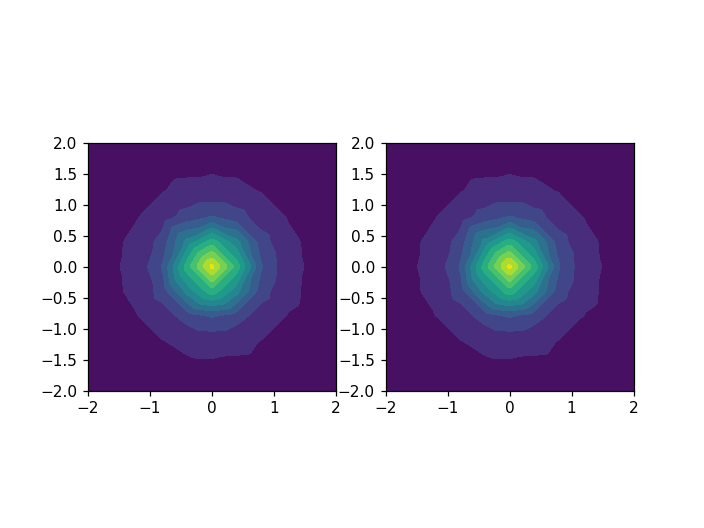

(<matplotlib.contour.QuadContourSet at 0x20a9731b198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20a9729c978>)

In [172]:

plt.figure()
ax1 = plt.subplot(1,2,1)
Utils.plot2Ddata(locXyz[:, :2], dpred, ax=ax1, clim=[0,200])
ax2 = plt.subplot(1,2,2)
Utils.plot2Ddata(locXyz[:, :2], btmi, ax=ax2, clim=[0,200])



<IPython.core.display.Javascript object>


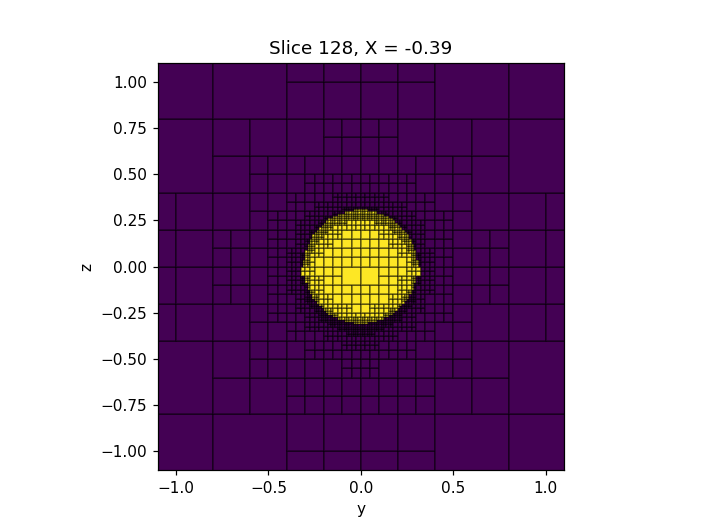

In [81]:
meshSurf = meshutils.mesh_builder_xyz(xySphere, [h, h, h], padding_distance=pad, mesh_type='TREE')
meshSurf.x0 = [-2,-2,-2]
meshSurf = meshutils.refine_tree_xyz(meshSurf, xySphereU, octree_levels=[4], method='surface', finalize=False)
meshSurf = meshutils.refine_tree_xyz(meshSurf, xySphereL, octree_levels=[4], method='surface', finalize=True)
actvSurf = Utils.ModelBuilder.getIndicesSphere(center, rad, meshSurf.gridCC)

plt.figure()

axs = plt.subplot()
meshSurf.plotSlice(actvSurf, grid=True, normal='X', ax=axs)

axs.set_xlim([-1.1,1.1])
axs.set_ylim([-1.1,1.1])
axs.set_aspect('equal')






In [174]:

# aa.to_latex()
print("\\begin{tabular}{|c|c|c|c|c|c|c|}\\hline")
print(" & \multicolumn{3}{c}{Tensor} \\vline \\vline & \multicolumn{3}{c}{Octree (Surface)}\\vline \\\\ \\hline" )

print("Cell size (m) & \\# Cells & Time (s) & $\phi_d$ & \\# Cells & Time (s) & $\phi_d$ \\\\ \\hline" )


for ii in range(statsSurf.shape[0]):
    print("%.2e & %i & %.1e & %.1e & %i & %.1e & %.1e \\\\" % (np.vstack(dX)[ii], statsTensor[:,0][ii], statsTensor[:,2][ii], statsTensor[:,1][ii], statsSurf[:,0][ii], statsSurf[:,2][ii], statsSurf[:,1][ii]))
    
    

print("\\hline")
print("\\end{tabular}")

    



\begin{tabular}{|c|c|c|c|c|c|c|}\hline
 & \multicolumn{3}{c}{Tensor} \vline \vline & \multicolumn{3}{c}{Octree (Surface)}\vline \\ \hline
Cell size (m) & \# Cells & Time (s) & $\phi_d$ & \# Cells & Time (s) & $\phi_d$ \\ \hline
1.00e-01 & 544 & 1.8e-01 & 4.2e+02 & 496 & 1.6e-01 & 7.7e+02 \\
5.00e-02 & 4196 & 9.6e-01 & 4.7e+01 & 2516 & 5.1e-01 & 7.1e+01 \\
2.50e-02 & 33478 & 6.5e+00 & 4.2e+00 & 10836 & 2.1e+00 & 5.2e+00 \\
1.25e-02 & 268080 & 6.5e+01 & 2.0e+00 & 47276 & 1.0e+01 & 7.7e+00 \\
\hline
\end{tabular}


<IPython.core.display.Javascript object>


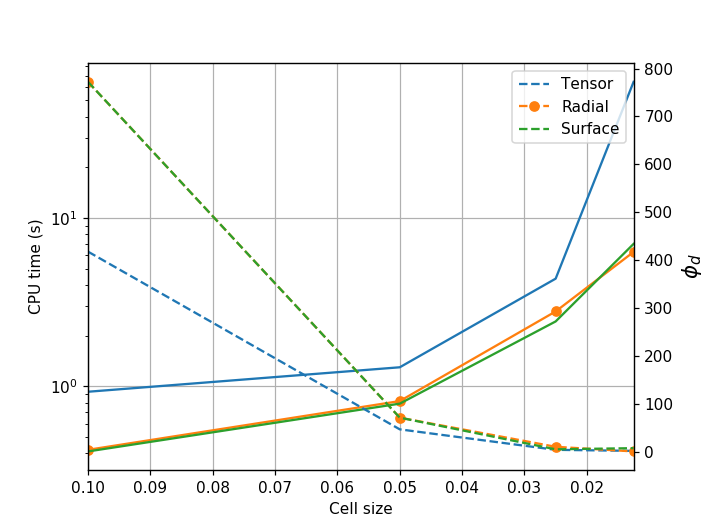

In [125]:


fig = plt.figure()
axs = plt.subplot()
ax2 = axs.twinx()

axs.semilogy(dX, mkvc(statsTensor[:,2]))
axs.semilogy(dX, mkvc(statsRadial[:,2]), marker='o')
axs.semilogy(dX, mkvc(statsSurf[:,2]))

ax2.plot(dX, mkvc(statsTensor[:,1]), linestyle='--')
ax2.plot(dX, mkvc(statsRadial[:,1]), marker='o', linestyle='--')
ax2.plot(dX, mkvc(statsSurf[:,1]), linestyle='--')
ax2.set_ylabel("$\phi_d$", size=14)


# plt.semilogy(H, volRadial)
# plt.semilogy(H, volBox)
# plt.semilogy(H, volSurf)
axs.set_xlim(dX[0], dX[-1])
axs.set_xlabel("Cell size")
axs.set_ylabel("CPU time (s)")
axs.grid('y')
plt.legend(["Tensor", "Radial", "Surface"])

plt.savefig("SphereTest.png", dpi=300, bbox_inches='tight')

# Simple plot

In [257]:
h = 0.5
pad = [[4, 4], [4,4]]
center = np.r_[0,0]
rad = .5

theta = np.linspace(0,np.pi,11)
x = np.cos(theta)
y = np.sin(theta)

xyU = rad*np.c_[x, y]
xyL = rad*np.c_[x, -y]

xy = np.r_[xyU, xyL]

meshTensor = meshutils.mesh_builder_xyz(xy*1.1, [h, h], padding_distance=pad, expansion_factor=1.5)
meshTensor.x0 = [meshTensor.x0[0]+0.1, meshTensor.x0[1]+0.1]
actvTensor = Utils.ModelBuilder.getIndicesSphere(center, rad, meshTensor.gridCC)

meshRadial = meshutils.mesh_builder_xyz(xy, [h, h], padding_distance=pad, mesh_type='TREE')
# meshRadial.x0 = [-3,-3]
meshRadial = meshutils.refine_tree_xyz(meshRadial, xy, octree_levels=[1], method='box', finalize=True)
actvRadial = Utils.ModelBuilder.getIndicesSphere(center, rad, meshRadial.gridCC)

<IPython.core.display.Javascript object>


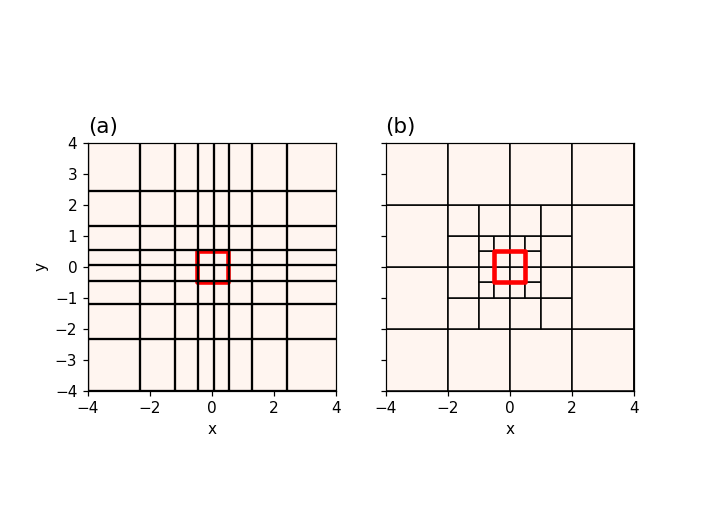

In [258]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
core = Rectangle((-0.5,-0.5), 1.,1., zorder=2)
pc = PatchCollection([core], facecolor='none',
                         edgecolor='r', linewidth=3)
    
fig = plt.figure()
ax1 = plt.subplot(1,2,1)
meshTensor.plotImage(np.zeros(meshTensor.nC), pcolorOpts={"cmap":'Reds'}, grid=True, ax=ax1)
# plt.scatter(xy[:,0], xy[:,1], 15, 'r', zorder=3)
# Add collection to axes
ax1.add_collection(pc)
ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.set_aspect('equal')
ax1.set_title("(a)", size=14, loc='left')


ax2 = plt.subplot(1,2,2)
meshRadial.plotImage(np.zeros(meshRadial.nC), pcolorOpts={"cmap":'Reds'}, grid=True, ax=ax2)

# plt.scatter(xy[:,0], xy[:,1], 15, 'r', zorder=3)
core = Rectangle((-0.5,-0.5), 1.,1., zorder=2)
pc = PatchCollection([core], facecolor='none',
                         edgecolor='r', linewidth=3)

ax2.add_collection(pc)
ax2.set_xlim([-4, 4])
ax2.set_ylim([-4, 4])
ax2.set_aspect('equal')
ax2.set_title("(b)", size=14, loc='left')
ax2.set_ylabel("")
ax2.set_yticklabels([])

plt.savefig("MeshType.png", dpi=300, bbox_inches='tight')